# Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules and important math things
import numpy as np
import sympy
from math import sqrt
from math import e
from math import pi
from math import cos, sin
from scipy.special import erf #importing the error function from scipy
from scipy.special import hermite #importing the hermite polynomial function from scipy
from scipy.special import jv #importing bessel functions
from time import time #import the "time" function from the "time" module
import matplotlib.pyplot as plt
from matplotlib import colors

# Part A (i)

We are going to want to calculate the value we obtain for the error function using 3 different methods, Simpson's Rule, the Trapezoidal Rule, and Scipy's built in error function. We will do this for N=10 slices.

First we must define functions to integrate using both the Trapezoidal and Simpson's methods. We will then call these functions with a specific mathematical function (in this case the error function), bounds, and slice numbers, and compare to the Scipy inbuilt function.

In [2]:
# Function to Integrate using Trapezoidal Method. Takes a function, begining and final integration bounds, and
# total slice number as inputs

def Trapezoidal(function,start,end,slices):
    width = (end-start)/slices # witdth of slices
    s = 0.5*function(start) + 0.5*function(end) # first add the area of end bits
    for k in range(1,slices): # add area of all inner slices
        s += function(start+k*width)
    return width*s # return final sum, i.e. total area

In [3]:
# Function to Integrate using Simpson's Method. Takes a function, begining and final integration bounds, and
# total slice number as inputs

def Simpson(function,start,end,slices):
    width = (end-start)/slices # witdth of slices
    s = function(start) + function(end) # first add the area of end bits
    odds = 0 # value to hold odd sum
    evens = 0 # value to hold even sum
    for k in range(1,slices,2): # add area of all ODD inner slices
        odds += function(start+k*width)
    for k in range(2,slices,2): # add area of all EVEN inner slices
        evens += function(start+k*width)
    return (width/3)*(s + 4*odds + 2*evens) # return final weighted sum according to equation, i.e. total area

In [4]:
# Define specific mathematical function - error function

def errorfunc(x):
    return (2/sqrt(pi))*e**(-x**2)

We have everything we need to test our integration methods. Print values using the three different methods:

In [5]:
sci = erf(3)
trap = Trapezoidal(errorfunc,0,3,10)
simp = Simpson(errorfunc,0,3,10)

print('Erf(3) Calculated Using Scipy: ', sci)
print(' ')
print('Erf(3) Calculated Using Trapezoidal Method: ', trap)
print('Relative Error Using Trapezoidal Method: ', abs(sci-trap)*100/sci,'%')
print(' ')
print('Erf(3) Calculated Using Simpson Method: ', simp)
print('Relative Error Using Simpson Method: ', abs(sci-simp)*100/sci,'%')

Erf(3) Calculated Using Scipy:  0.999977909503
 
Erf(3) Calculated Using Trapezoidal Method:  0.9999719125941187
Relative Error Using Trapezoidal Method:  0.000599704136032 %
 
Erf(3) Calculated Using Simpson Method:  0.9999770112979358
Relative Error Using Simpson Method:  8.98224907782e-05 %


The values are close (remarkably good considering the crude approximations made!), although they do have errors on the order of 1e-6 and 1e-7, with the Simpson's method being slightly more accurate than the Trapezoidal Method, as predicted.

# Part A (ii)

We now seek to find how many slices it takes to approximate functions to an error of 1e-11, again using scipy's built in function as the default value. We also want to find the time it takes to do these calculations, and will average the same calculation multiple times to ensure an accurate value. 

To do this we will define 2 functions. The first will test the scipy method. By default it will test the time it takes to calculate the scipy error function at x=3 (looping 100 times), but I write it in a way that will let me use the function with any other mathematical expression.

The second function will both test the time it takes to perform caluclations (as before), but will also find the necessary slice numbers to get error to within a certain tolerance. Once again I write it in a way that tests using the error function at x=3 for a defualt 1e-11 tolerance, but can still be called using any values.

In [6]:
# Function to test the calculation of a mathematical function. Performs calculation for a given function
# at a given value 100 times, and returns the average value and time it takes to perform the calculation
# Defualt Setting: tests the scipy error function at a value of x=3

def testscipy(function=erf,upperbound=3):
    times = [] #list to hold time values for each loop
    values = [] #list to hold calculated error function values for each loop
    for i in range(100): #loop 100 times
        start=time() #save start time
        value = function(upperbound) #compute error function using scipy
        end=time() #save end time
        times.append(end-start) #save calculation time to time list
        values.append(value) #save value to values list (should all be identical)
    scipytime = np.mean(times) #save avaerage time to be used later on
    scipyvalue = np.mean(values) #save avaerage value to be used later on
    return (scipytime,scipyvalue)

In [7]:
# Function to test the calculation of an integration method. (juiced-up version of testscipy)
# For a given integration method, it first finds the required number of slices for a given tolerance.
# It then performs the integration at that slice number 100 times and returns the average value
# and time to perform the calculation.
# It requires a true value as an input to compare to, and a particular integration method
# It has optional inputs for all other integration parameters
# Default setting: print required slice number to have error < 1e-11 when integrating the error function from
# x=0 to x=3, setting the initial slice number at 100. Then return calulation time and value at that slice number

def testintegration(method,truevalue,tolerance=1.e-11,function=errorfunc,lowerbound=0,upperbound=3,slices=100):
# First find the minimum slice value that works
    loopflag = True # Set a flag to loop over
    while loopflag == True:  #loop until error specified to be good enough
        calculatedvalue = method(function,lowerbound,upperbound,slices) #calculate error function        
        if abs(truevalue-calculatedvalue)<=tolerance: #check if error is good enough
            print('Found Required Number of Slices for {0}: '.format(method.__name__), slices)
            loopflag = False
        else: slices += 1
# Now do calculation 100 times and find average time
    times = [] #list to hold time values for each loop
    values = [] #list to hold calculated error function values for each loop
    for i in range(100): #loop 100 times
        start=time() #save start time
        value = method(function,lowerbound,upperbound,slices) #compute error function using method
        end=time() #save end time
        times.append(end-start) #save calculation time to time list
        values.append(value) #save value to values list (should all be identical)
    methodtime = np.mean(times) #save avaerage time to be used later on
    methodvalue = np.mean(values) #save avaerage value to be used later on
    return (methodtime,methodvalue)

We have everything we need to test our integration methods. Test the three different methods:

In [8]:
scipytime, scipyvalue = testscipy()
simpsontime, simpsonvalue = testintegration(Simpson,scipyvalue)
trapezoidaltime, trapezoidalvalue = testintegration(Trapezoidal,scipyvalue)

# Note: takes ~20 seconds to run

Found Required Number of Slices for Simpson:  184
Found Required Number of Slices for Trapezoidal:  7914


In [9]:
# Print the Values calculated above

print('Erf(3) Calculated Using Scipy = ', scipyvalue)
print('Erf(3) Calculated Using Simpsons = ', simpsonvalue)
print('Erf(3) Calculated Using Trapezoidal = ', trapezoidalvalue)
print(' ')
print('Time to Calculate Erf(3) Using Scipy = ', scipytime)
print('Time to Calculate Erf(3) Using Simpsons = ', simpsontime)
print('Time to Calculate Erf(3) Using Trapezoidal = ', trapezoidaltime)

Erf(3) Calculated Using Scipy =  0.999977909503
Erf(3) Calculated Using Simpsons =  0.999977909493
Erf(3) Calculated Using Trapezoidal =  0.999977909493
 
Time to Calculate Erf(3) Using Scipy =  3.04698944092e-06
Time to Calculate Erf(3) Using Simpsons =  0.000164258480072
Time to Calculate Erf(3) Using Trapezoidal =  0.00428944349289


As expected, we find that the Simpson's method is more accurate, required much fewer slices to reach the same level of accuracy as the Trapezoidal method. (Becuase Simpson's method is a more sophisticated approximation). As such due to the much smaller number of slices, Simpson's method is also much faster than the Trapezoidal method when restricting to the same error magnitude. (Note: Trapezoidal is faster when restricting to the same slice number). 

# Part A (iii)

To test the Trapezoidal rule, we will use the formula:
\begin{equation}
\epsilon_N = \frac{1}{3} \big| \text{Trapezoidal($N$ slices)} - \text{Trapezoidal($\frac{N}{2}$ slices)} \big|
\end{equation}

Similarly, to test Simpson's rule, we will use the formula:
\begin{equation}
\epsilon_N = \frac{1}{15} \big| \text{Trapezoidal($N$ slices)} - \text{Trapezoidal($\frac{N}{2}$ slices)} \big|
\end{equation}

We will measure the errors of both formulas for a wide range of slices, from N=20 (because N=10 can not be measured as N/2 = 5, and can only have even N values) to N=1000 in N=20 increments. i.e. N=20,40,60,...,1000

In [10]:
testslices = np.linspace(20,1000,50, dtype=int) # make array to hold all the N values
traptesterrors = [] # make empty list to hold all the trapezoidal method errors for different N values
simptesterrors = [] # make empty list to hold all the simpson's method errors for different N values
end = 3 # integration bounds as before
start = 0 # integration bounds as before

for testslice in testslices: # loop for each N value
    # Calculate trapezoidal error according to formula
    traperror = 1/3 * abs(Trapezoidal(errorfunc,start,end,testslice) - Trapezoidal(errorfunc,start,end,int(testslice/2)))
    traptesterrors.append(traperror) # append to list
    # Calculate simpsons error according to formula
    simperror = 1/15 * abs(Simpson(errorfunc,start,end,testslice) - Simpson(errorfunc,start,end,int(testslice/2)))
    simptesterrors.append(simperror) # append to list

In [11]:
# Print results in a pretty way
for i in range(len(testslices)): # loops sgain for each N value (Note: could have included this in previous loop)
    print('N =',testslices[i], '   Trap. Error = ', traptesterrors[i], '   Simp. Error = ', simptesterrors[i])

N = 20    Trap. Error =  1.48257908668e-06    Simp. Error =  5.54408353152e-08
N = 40    Trap. Error =  3.86206934729e-07    Simp. Error =  4.14991015626e-09
N = 60    Trap. Error =  1.72984151559e-07    Simp. Error =  8.47520971921e-10
N = 80    Trap. Error =  9.75691041294e-08    Simp. Error =  2.71298716825e-10
N = 100    Trap. Error =  6.25231485474e-08    Simp. Error =  1.11723164054e-10
N = 120    Trap. Error =  4.3448674288e-08    Simp. Error =  5.40363605713e-11
N = 140    Trap. Error =  3.19346977751e-08    Simp. Error =  2.92188421606e-11
N = 160    Trap. Error =  2.4456577763e-08    Simp. Error =  1.71471355633e-11
N = 180    Trap. Error =  1.93272786294e-08    Simp. Error =  1.07132377044e-11
N = 200    Trap. Error =  1.5657160124e-08    Simp. Error =  7.03285577922e-12
N = 220    Trap. Error =  1.29410648864e-08    Simp. Error =  4.80551894573e-12
N = 240    Trap. Error =  1.08748963538e-08    Simp. Error =  3.3941072175e-12
N = 260    Trap. Error =  9.26671994694e-09    S

As before we find that Simpson's Method is more accurate that the Trapezoidal Method, resulting in much smaller errors for the same N value. This is because it is a much more sophisticated approximation.

# Part A (iv)

Using hermite Polynomials, we find the derivatives of the error function to be given by:
\begin{equation}
\frac{d^n}{dx^n} \text{erf}(x)= (-1)^{n-1} \frac{2}{\sqrt{\pi}} H_{n-1}(x) e^{-x^2}
\end{equation}
Therefore we know that the first derivative is:
\begin{equation}
\frac{d}{dx} \text{erf}(x)= \frac{2}{\sqrt{\pi}}e^{-x^2}
\end{equation}
And likewise the third derivative is:
\begin{equation}
\frac{d^3}{dx^3} \text{erf}(x)= \frac{4x^2 -2}{\sqrt{\pi}}e^{-x^2}
\end{equation}

We can plug these in to the Euler-Maclaurin formulas to get analytic values for the errors.
\begin{equation}
\epsilon_{\text{trapezoidal}} = \frac{1}{12}h[f'(a) - f'(b)] = \frac{1}{6 \sqrt{\pi}}h[e^{-a^2} - e^{-b^2}]
\end{equation}
\begin{equation}
\epsilon_{\text{simpsons}} = \frac{1}{180}h^4[f'''(a) - f'''(b)] = \frac{1}{180 \sqrt{\pi}}h^4[(4a^2 -2)e^{-a^2} - (4b^2 -2)e^{-b^2}]
\end{equation}

We will compare these analytic values to the estimates made in the previous section. First compute the analytic errors for various N values.

In [12]:
traptesterrors2 = [] # make empty list to hold all the trapezoidal method errors for different N values
simptesterrors2 = [] # make empty list to hold all the simpson's method errors for different N values
end = 3 # integration bounds as before
start = 0 # integration bounds as before

for testslice in testslices: # loop for each N value
    # We use h = width = (end-start)/N
    # Calculate trapezoidal error according to formula
    traperror = 1/(6*sqrt(pi))*((end-start)/testslice) * (e**(-(start**2))-e**(-(end**2)))
    traptesterrors2.append(traperror) # append to list
    # Calculate simpsons error according to formula
    simperror = 1/(180*sqrt(pi))*((end-start)/testslice)**4*((4*start**2-2)*e**(-start**2)-(4*end**2-2)*e**(-end**2))
    simptesterrors2.append(simperror) # append to list

In [13]:
# Print results in a pretty way
for i in range(len(testslices)): # loops sgain for each N value (Note: could have included this in previous loop)
    print('N =',testslices[i], '   Approx. Trap. Error = ', traptesterrors[i],
          '   Actual Trap. Error = ', traptesterrors2[i])
print(' ')
for i in range(len(testslices)):
    print('N =',testslices[i], '   Approx. Simp. Error = ', simptesterrors[i],
          '   Actual Simp. Error = ', simptesterrors2[i])

N = 20    Approx. Trap. Error =  1.48257908668e-06    Actual Trap. Error =  0.0141029989255
N = 40    Approx. Trap. Error =  3.86206934729e-07    Actual Trap. Error =  0.00705149946277
N = 60    Approx. Trap. Error =  1.72984151559e-07    Actual Trap. Error =  0.00470099964185
N = 80    Approx. Trap. Error =  9.75691041294e-08    Actual Trap. Error =  0.00352574973139
N = 100    Approx. Trap. Error =  6.25231485474e-08    Actual Trap. Error =  0.00282059978511
N = 120    Approx. Trap. Error =  4.3448674288e-08    Actual Trap. Error =  0.00235049982092
N = 140    Approx. Trap. Error =  3.19346977751e-08    Actual Trap. Error =  0.00201471413222
N = 160    Approx. Trap. Error =  2.4456577763e-08    Actual Trap. Error =  0.00176287486569
N = 180    Approx. Trap. Error =  1.93272786294e-08    Actual Trap. Error =  0.00156699988062
N = 200    Approx. Trap. Error =  1.5657160124e-08    Actual Trap. Error =  0.00141029989255
N = 220    Approx. Trap. Error =  1.29410648864e-08    Actual Trap. 

The two methods give very different results! The Euler-Maclaurin formulas give a much larger error estimate than the approximate error methods. This is because the approximate method only used an order estimation to get its final result. They are not equivalent. The Euler-Maclaurin formulas are derived from the taylor expansion, while the approximate method uses scaling relations between N values to try to estimate a result.

# Part B (a)

We want to use Simpson's Rule to evaluate $J_m(x) = \frac{1}{\pi} \int_{0}^{\pi} \cos(m\theta - x \sin{\theta})d \theta $ from $x=0$ to $x=20$ using $N=1000$ slices.

In [14]:
# Define function to evaluate Bessel Function for a particular m, x, and slice number (accuracy)
def calcbesselfunc(m,x,slices):
    # First define function for argument inside integral (must be defined for particular m, x)
    def besselargument(theta):
        return ((cos(m*theta-x*sin(theta)))/pi)
    # Call Simpson's Rule function using defined formula. We always integrate from theta=0 to theta=pi
    return Simpson(besselargument,0,pi,slices)

Now use this function to make a plot from $x=0$ to $x=20$ of the first 3 Bessel Functions with $N=1000$:

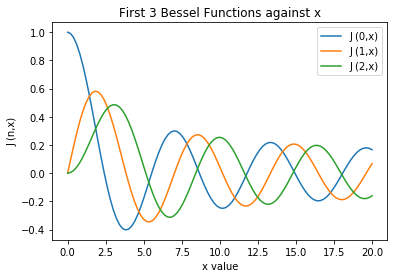

In [15]:
xvalues = np.linspace(0,20,101) # Make an array of x values along which to plot
bessel0 = [] # Empty list to store values for 0th Bessel Function
bessel1 = [] # Empty list to store values for 1st Bessel Function
bessel2 = [] # Empty list to store values for 2nd Bessel Function
N=1000 #slice value

# Loop through all the x values and calculate the besselfunctions at those points, appending to the lists
for xvalue in xvalues:
    bessel0.append(calcbesselfunc(0,xvalue,1000)) # 0th bessel func (m=0)
    bessel1.append(calcbesselfunc(1,xvalue,1000)) # 1st bessel func (m=1)
    bessel2.append(calcbesselfunc(2,xvalue,1000)) # 2nd bessel func (m=2)

# Plot Bessel Functions
plt.figure()
plt.plot(xvalues,bessel0,label='J (0,x)') # Plot 0th bessel func (m=0)
plt.plot(xvalues,bessel1,label='J (1,x)') # Plot 1st bessel func (m=1)
plt.plot(xvalues,bessel2,label='J (2,x)') # Plot 2nd bessel func (m=2)
plt.xlabel('x value')
plt.ylabel('J (n,x)')
plt.title('First 3 Bessel Functions against x')
plt.legend(loc='best')
plt.show()

The result looks quite good, however we want to be extra sure that we are correct! Plot against the in-built scipy Bessel functions, scipy.special.jv.

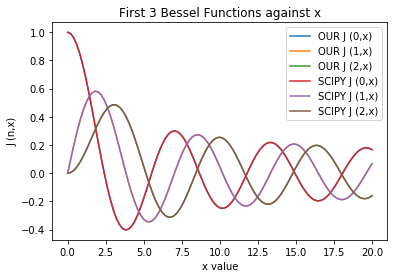

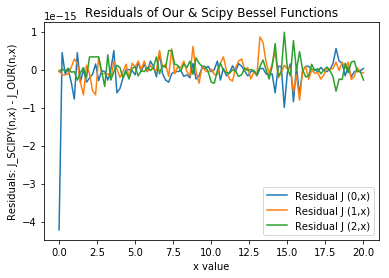

In [16]:
# Plot Bessel Functions against Scipy's Bessel Functions
plt.figure()
plt.plot(xvalues,bessel0,label='OUR J (0,x)') # Plot OUR 0th bessel func (m=0)
plt.plot(xvalues,bessel1,label='OUR J (1,x)') # Plot OUR 1st bessel func (m=1)
plt.plot(xvalues,bessel2,label='OUR J (2,x)') # Plot OUR 2nd bessel func (m=2)
plt.plot(xvalues,jv(0,xvalues),label='SCIPY J (0,x)') # Plot SCIPY's 0th bessel func (m=0)
plt.plot(xvalues,jv(1,xvalues),label='SCIPY J (1,x)') # Plot SCIPY's 1st bessel func (m=1)
plt.plot(xvalues,jv(2,xvalues),label='SCIPY J (2,x)') # Plot SCIPY's 2nd bessel func (m=2)
plt.xlabel('x value')
plt.ylabel('J (n,x)')
plt.title('First 3 Bessel Functions against x')
plt.legend(loc='best')
plt.show()

# Plot differences between Bessel Functions (Residuals)
plt.figure()
plt.plot(xvalues,jv(0,xvalues)-bessel0,label='Residual J (0,x)') # Plot difference in 0th bessel funcs (m=0)
plt.plot(xvalues,jv(1,xvalues)-bessel1,label='Residual J (1,x)') # Plot difference in 1st bessel funcs (m=1)
plt.plot(xvalues,jv(2,xvalues)-bessel2,label='Residual J (2,x)') # Plot difference in 2nd bessel funcs (m=2)
plt.xlabel('x value')
plt.ylabel('Residuals: J_SCIPY(n,x) - J_OUR(n,x)')
plt.title('Residuals of Our & Scipy Bessel Functions')
plt.legend(loc='best')
plt.show()

Not only are our Bessel functions visually indistinguuishable from Scipy's in-build functions, we find that even the residuals (Difference between Scipy function and our calcualted functions) are on the order of 1e-15, menaing the error is entirely negligible. Our integrations are remarkably accurate.

# Part B (b)

We want to apply the previous step to a real world scenario - the interference pattern of light. This is given by the function $I(r) = \Big( \frac{J_1(kr)}{kr} \Big)^2$. We will use our bessel functions to simulate this for a range of different wavelengths.

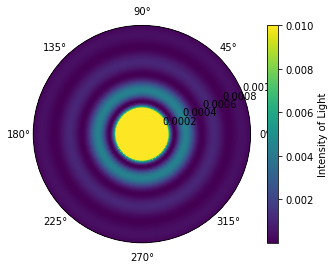

In [43]:
wavelength = 500.e-6 # set wavelength of light
k=(pi)*2/wavelength # convert to wavenumber for equation

# Define a function to calculate intensities according to the equation given above
def calcintensity(r):
    return (calcbesselfunc(1,k*r,1000)/(k*r))**2

radii = np.linspace(1e-16,1e-3,1000) # Make an array of radii along which to plot
intensities = [] # Make empty array to hold intensities for each radius
# loop over all the radii, and calculate the intensity at each point, storing it in a list
for radius in radii: 
    intensities.append(calcintensity(radius))

# Now plot the result. Due to radial symmetry we can use polar coordinates to create a 2-d colour plot.
fig, ax = plt.subplots(subplot_kw=dict(projection='polar')) # Declare the figure

azm = np.linspace(0, 2 * np.pi) # Declare azimuth range
r, th = np.meshgrid(radii, azm) # Mesh together the radius and azimuth data to 2-d grid
z = np.tile(intensities, (r.shape[0], 1)) # Assign intensities to each grid

plt.pcolormesh(th, r, z, vmin=min(intensities), vmax=0.01) # plot the result using colourmesh
#NOTE: Adjust vmax to make pattern clearer or fainter

plt.colorbar(label='Intensity of Light')
plt.show()

Our Diffraction pattern is clearly visible, with a very strong centre ring and weaker fringes that fall off accourding to the function defined above.